### Machine Learning For Everyone and Robot
[Lecture notes](https://github.com/idebtor/HuStar-ML) for HuStar Project by idebtor@gmail.com, Handong Global University
**************

# 제 11 강: Gradient Descent 1 - Batch


## 학습목표 
- 경사하강법$^{gradient \ descent}$ 학습의 정확도를 이해한다.
- 배치$^{batch}$, 확률적$^{stochastic}$, 미니배치$^{mini-batch}$ 경사하강법들의 차이를 이해한다.
- 다양한 기계 학습 기술을 익힌다. 

## 학습 내용
- 다양한 경사하강법들의 장단점 비교하기
- 배치$^{batch}$, 미니배치$^{mini-batch}$ 경사하강법$^{gradient descent}$의 정확도 이해하기 
- 과적합$^{overfitting}$ 원인과 해결 방법
- 학습 조기 종료$^{early \ stopping}$
- 데이터 증식
- 드롭아웃$^{dropout}$

## 1. 경사하강법$^{Gradient \ Descent}$

우리는 앞 강의에서 MNIST 데이터셋의 분류 문제를 다룰 수 있는 신경망에 대해 공부했습니다. 또한, 신경망이 학습하는 가장 기본적인 (배치) 경사하강법에 대해 배웠습니다. 이번 장에서는 경사 하강법에 대해 복습하고, MNIST 데이터셋을 학습하는 실습을 하도록 하겠습니다.

먼저 경사 하강법이란 현재 위치에서 어떤 함수의 극소점을 찾는 방법을 말합니다. 그렇다면 반대로 극대점을 찾는 방법은 경사 상승법이라고 합니다. 우리가 신경망을 학습 시킬 때에는 신경망의 예측 값과 레이블 간의 오차율을 작게 만드는 것이 목표이기 때문에 오차율의 극소점을 발견하는 경사 하강법을 사용합니다.

다음과 같이 $x^2 + y^2$의 함수 그래프가 있다고 할 때, 그래프가 가장 움푹 파인 곳이 극소점이라는 것을 한 눈에 찾을 수 있을 것입니다.
즉, 기울기가 0인 곳을 극소점/극대점 이라고 부르며 이는 그래프의 미분 값이 0인 곳을 말합니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/GradientDescentMesh.png?raw=true" width="300">

하지만, 2차원 함수보다 차원이 높은 함수일 수록 발견하기 어려울 것 입니다. 신경망에서는 복잡한 함수의 극소점을 어떻게 찾아갈까요?

아래 그림과 같이 여러분이 등산을 한다고 생각해 봅시다. 아니면, 숲이 우거져 앞이 보이지 않는 밀림에 있다고 상상해 봅시다. 여러분은 지도도 나침반도 없는 상황에서 정상에 도달하여야 합니다. 현재 있는 위치도 어디인지 모르고 숲이 우거져 한치 앞도 보이지 않습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/GradientDescentEx.png?raw=true" width="400">

가장 직관적인 방법으로는 현재 본인이 위치한 곳 보다 조금 더 높아 보이는 곳으로 가는 방법일 것입니다. 그리고 새로운 위치에서 다시 한번 지금 내가 갈 수 있는 가장 높아 보이는 곳으로 한 발 나아갑니다. 이런 작업을 반복하다 보면 결국 정상에 도달해 있지 않을까요?

경사 하강법은 정상에 오르는 방법과 유사하게 오차율을 최소화 하는 극소점을 찾아 내려갑니다. 아래 식을 보며 조금 더 얘기해 봅시다.

\begin{align}
  \Delta w &= -\eta \Delta{E(w)} \\
               &=-\eta \frac{\partial{E(w)}}{\partial{w_j}} 
\end{align}

우선 $\eta$는 학습율을 의미하며, 위의 예제에서는 여러분들의 보폭을 말합니다. 한 발 내딛을 때 얼마나 큰 보폭으로 산을 올라갈지를 결정합니다. <br>또한, 우리가 원하는 것은 오차율의 극대점을 찾는 것의 반대이기 때문에 $\eta\ 앞에 -$기호를 사용하여 극소점을 거꾸로 찾아갑니다.<br>산의 정상에서 내려오는 일이라고 생각하면 됩니다. 뒤에 따라오는 미분 값은 신경망의 가중치에 따른 오차 값의 변화(기울기)가 0이 되는 점을 찾는 방법입니다.

이제 기본적인 경사 하강법에 대한 복습을 마쳤으니 MNIST 데이터셋을 직접 학습시켜보도록 하겠습니다. 아래는 앞에서 배운 비용함수 입니다.


\begin{align}
E(w) = \frac{1}{2} \sum_{i} \big(y^{(i)} - g(z^{(i)})\big)^2 \tag1
\end{align}

하지만, 우리는 6만개의 MNIST 데이터 전체를 이용하여 학습하기 때문에 식(2) 처럼 데이터의 개수를 비용함수에 나누어 줘야 합니다.
여기서는 데이터의 개수를 $m$으로 표기합니다.

\begin{align}
E(w) = \frac{1}{2m} \sum_{i} \big(y^{(i)} - g(z^{(i)})\big)^2  \tag{2} 
\end{align}

\begin{align}
\Delta w &= -\eta \Delta{E(w)} \\
               &=-\eta \frac{\partial{E(w)}}{\partial{w_j}} \tag{3}
\end{align}

최종적으로 신경망의 가중치는 6만개의 모든 데이터를 보고 그 중 가장 오차율을 최소화 하는 방향으로 $\eta$만큼 한 걸음 내딛어 업데이트 합니다.

## 2. 배치 경사하강법 신경망의 구현 - BatchBD 

우리는 앞 강의에서 MNIST 데이터셋의 분류 문제를 다룰 수 있는 신경망에 대해 공부습니다. 주어진 학습 자료를 __모두 사용하여__ 오차를 계산한 후 그 오차를 반영하여 가중치를 조정하고 이것을 반복하며 최적의 가중치 값을 찾아가는 방법을  __배치$^{Batch}$ 경사하강법__ 이라고 합니다. 모든 학습 자료를 한 묶음$^{batch}$으로 처리하여 오차를 계산한다하여 그렇게 이름이 붙여진 모양입니다.  

반면에 하나의 샘플이 신경망에 들어올 때마다 오차를 계산하고 가중치를 조정하는 방법을 __확률적$^{stochastic}$ 경사하강법__ 이라고 부릅니다. 

또한, 작은 묶음, 예를 들면, 32개의 자료를 묶음으로 하여 오차를 계산하고 가중치를 조정하는 방법을 __미니배치$^{mini-batch}$ 경사하강법__ 이라고 합니다. 

순전파와 역전파를 실행하면서 가중치를 조정하는 한 번의 과정을 __epoch__ 라고 합니다.  다음은 배치 경사하강법을 구현한 인공신경망 BatchGD_nn 클래스입니다. 이 클래스를 사용하여 MNIST 데이터셋을 학습하는 신경망 모델을 만들어낼 것입니다. 

In [1]:
#%%writefile code/mnist_nn.py
#%load code/mnist_nn.py
import joy
import numpy as np

class BatchGD(object):
    """ Batch Gradient Descent """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, random_seed=1):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        # print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)        # hidden layer inputs
        A1 = self.g(Z1)                 # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)        # output layer inputs
        A2 = self.g(Z2)                 # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        self.cost_ = []
        self.m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y) 
        
        for epoch in range(self.epochs + 1):
            if epoch % 100 == 0:
                print('Training epoch {}/{}.'.format(epoch, self.epochs))

            A0 = np.array(X, ndmin=2).T       
            Y0 = np.array(Y, ndmin=2).T     

            Z1, A1, Z2, A2 = self.forpass(A0)  
            E2 = Y0 - A2                      
            E1 = np.dot(self.W2.T, E2)         

            dZ2 = E2 * self.g_prime(Z2)          
            dZ1 = E1 * self.g_prime(Z1)       
            
            self.W2 +=  self.eta * np.dot(dZ2, A1.T) / self.m_samples    
            self.W1 +=  self.eta * np.dot(dZ1, A0.T) / self.m_samples    
            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                 # activation_function: sigmoid
        #x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       # fully vectorized calculation
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100
    
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = nn.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1        
        return scores/m_samples * 100

## 3. MNIST 인공신경망 모델 만들기

다음 코드는 BatchGD 클래스와 MNIST 학습자료를 사용하여 MNIST 인공신경망 모델을 학습하고, 학습 자료 자체의 정확도를 측정합니다.

__A Sample Run:__

Samples:3000, hidden:100, eta:0.2, epochs:3000

```
Training epoch 0/3000.
Training epoch 100/3000
...
Training epoch 2900/3000.
Training epoch 3000/3000.
MNIST self accuracy 98.05%
```

다음은 MINST 데이터셋의 첫 3000개의 이미지를 추출하여, 100개의 은닉층 노드 `n_h = 100`, 학습률 `eta = 0.2`, 반복 횟수 `epochs = 3000`으로 학습하는 코드입니다. 

In [6]:
import joy
import numpy as np

# read mnist dataset
(X, y), (Xtest, ytest) = joy.load_mnist()   

# To speed up a bit, just use the first 3000 images from 60000
X = X[:1000]
y = y[:1000]

# set hyperparameters and instantiate the class object       
nn = BatchGD(784, 100, 10, eta = 0.2, epochs = 200, random_seed=1)  

# train the model  
nn.fit(X, y)

# evaluate the accuray of itself
accuracy = nn.evaluate(X, y)   
print('MNIST self accuracy {}%'.format(accuracy))

Training epoch 0/200.
Training epoch 100/200.
Training epoch 200/200.
MNIST self accuracy 81.2%


## 3. MNIST 인공신경망 모델 적용하기

MNIST 데이터셋을 위한 인공신경망의 모델을 만들었으므로, 이 모델을 만들 때 전혀 사용하지 않았던, 테스트 데이터셋을 이 모델에 적용하여 정확도를 측정하고자 합니다. 

### 3.1 Test 데이터 셋으로 정확도 평가하기

In [7]:
(X, y), (Xtest, ytest) = joy.load_mnist()   
accuracy = nn.evaluate(Xtest, ytest)      
print('MNIST test accuracy {}%'.format(accuracy))

MNIST test accuracy 68.22%


다음 코드는 Xtest, ytest자료의 처음 10개를 시각화하여 체크해보는 코드입니다. 

[7 2 1 0 4 1 4 9 5 9]


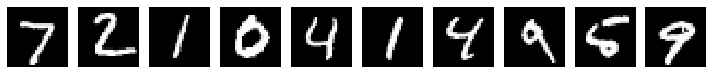

In [8]:
joy.show_mnist_grid(Xtest[:10].reshape(-1, 28, 28))
print(ytest[:10])

### 3.2 Test 데이터 셋의 일부분으로 정확도 평가하기

다음 코드는 Xtest, ytest 자료 10,000개 중에서 무작위를 1000개를 선택하여 테스트하는 코드입니다.

In [9]:
selected = np.random.choice(X.shape[0], 1000)
Xtest = X[selected]
ytest = y[selected]

accuracy = nn.evaluate(Xtest, ytest)      
print('MNIST test accuracy {}%'.format(accuracy))

MNIST test accuracy 67.30000000000001%


### 3.2 Epoch의 변화에 따른 정확도 평가하기
다음 코드는 3000개의 샘플을 300번씩 epoch할 때마다 정확도를 측정하여 저장한 후, 그 변화를 시각화합니다. 

__A Sample Run:__ 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/gradient_batch2.png?raw=true" width="400">

In [12]:
(X, y), (Xtest, ytest) = joy.load_mnist() 
# To speed up a bit, just use the first 3000 images from 60000

X = X[:1000]
y = y[:1000]

epoch_list = [i for i in np.arange(300, 1300, 200)]
print(epoch_list)
self_accuracy = []
test_accuracy = []
for i, e in  enumerate(epoch_list):  
    nn = BatchGD(784, 100, 10, eta=0.2, epochs = e)  
    nn.fit(X, y)
    self_accuracy.append(nn.evaluate(X, y))  
    test_accuracy.append(nn.evaluate(Xtest, ytest))

[300, 500, 700, 900, 1100]
Training epoch 0/300.
Training epoch 100/300.
Training epoch 200/300.
Training epoch 300/300.
Training epoch 0/500.
Training epoch 100/500.
Training epoch 200/500.
Training epoch 300/500.
Training epoch 400/500.
Training epoch 500/500.
Training epoch 0/700.
Training epoch 100/700.
Training epoch 200/700.
Training epoch 300/700.
Training epoch 400/700.
Training epoch 500/700.
Training epoch 600/700.
Training epoch 700/700.
Training epoch 0/900.
Training epoch 100/900.
Training epoch 200/900.
Training epoch 300/900.
Training epoch 400/900.
Training epoch 500/900.
Training epoch 600/900.
Training epoch 700/900.
Training epoch 800/900.
Training epoch 900/900.
Training epoch 0/1100.
Training epoch 100/1100.
Training epoch 200/1100.
Training epoch 300/1100.
Training epoch 400/1100.
Training epoch 500/1100.
Training epoch 600/1100.
Training epoch 700/1100.
Training epoch 800/1100.
Training epoch 900/1100.
Training epoch 1000/1100.
Training epoch 1100/1100.


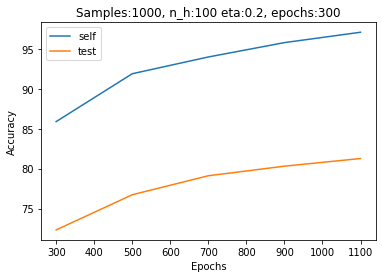

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Samples:{}, n_h:{} eta:{}, epochs:{}".format(len(y), nn.n_h, nn.eta, nn.epochs))
plt.legend(loc='best')
plt.show()

### 1.3 오차(self.cost_)의 시각화 

신경망을 학습시키면서 발생하는 오차(손실)를 BatchGD 클래스 객체의 속성 `cost_`에 저장되어 있습니다. 이를 시각화해서 신경망이 어떻게 학습을 하였는지, 손실을 최소화하는 방향을 수렴하였는지 분석할 수 있습니다.  다음 셀의 코드를 실행한 후, 그 결과를 아래와 같이 시각화할 수 있습니다.  

__A Sample Run:__ 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/gradient_batch3.png?raw=true" width="400">

In [16]:
# read mnist dataset
(X, y), (Xtest, ytest) = joy.load_mnist()   
X = X[:1000]
y = y[:1000]   
nn = BatchGD(784, 100, 10, eta = 0.2, epochs = 300)  
nn.fit(X, y)      
accuracy = nn.evaluate(X, y)      
print('MNIST self accuracy {}%'.format(accuracy))

Training epoch 0/300.
Training epoch 100/300.
Training epoch 200/300.
Training epoch 300/300.
MNIST self accuracy 85.9%


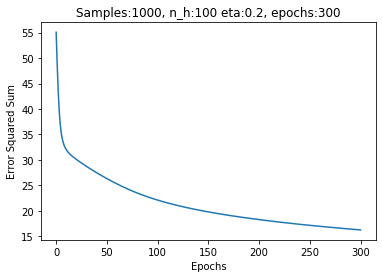

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.title("Samples:{}, n_h:{} eta:{}, epochs:{}".format(len(y), nn.n_h, nn.eta, nn.epochs))
plt.show()

### 1.4 테스팅을 위한 질문들...

- 과적합$^{overfitting}$이 과연 언제 일어날 것인가? 
    - 고의로 과적합이 좀 쉽게 일어나게 하려면 어떻게 조건으로 모델을 만들면 될 것인가?
- 삼층 신경망으로 제한된 모델에서, 어떤 조건으로 어느 정도까지 정확도를 높일 수 있을 것인가?

In [ ]:
(X, y), (Xtest, ytest) = joy.load_mnist() 

m = 1000          # number of samples
X = X[:m]
y = y[:m]
epoch_list = [i for i in np.arange(1000, 5000, 500)]
print(epoch_list)
self_accuracy = []
test_accuracy = []

for i, e in  enumerate(epoch_list):
    nn = BatchGD(784, 150, 10, eta=0.2, epochs = e)  
    nn.fit(X, y)  
    self_accuracy.append(nn.evaluate(X, y))  
    test_accuracy.append(nn.evaluate(Xtest, ytest))

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Early Stopping:"Beautiful free lunch"')
plt.legend(loc='best')
plt.show()

----------
_For God so loved the world that he gave his one and only Son, that whoever believes in him shall not perish but have eternal life. John3:16_